# Dimensionalty Reduction 


-Machine Learning problems invlove thousands or even millions of features. 

-This makes the model really slow

-Sometimes, it's harder' to find good solutions 

-Dimensionalty Reduction is a way to reduce these features into a few features without loosing information

-Two Methods

   Feature Selection
    
      1. Univariate Selection
      2. Recursive Feature Elimination
      3. Feature Importance
      4. Forward Selection(Not in sklearn)
      5. Backward Regression(Not in Sklearn)
      6.LASSO Regression
      7.Adaptive LASSO Regression
   Feature Extraction
    
      1. Principal Component Analysis
      2.Linear Discriminant Analysis
      

## Univariate Selection

-Involves using statistical test to select features that have the strongest relationship with the output variable/target.

-Sklearn has SelectKBest that can be used with  statistical tests to select features.

-We use chisquare in the example below

In [30]:
# Univariate Selection using sklearn
import pandas as pd
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

filename='C:\\Users\\akoguab\\Desktop\\R and D\\Data science\\data set\\pimas.csv'
names= ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi','age','class']

dataset=pd.read_csv(filename,names=names)

# First 20 rows of your data

print(dataset.head(20))

# dimensions of your data

print(dataset.shape)

array=dataset.values
X=array[:,0:8]
Y=array[:,8]

# Feature Selection

test= SelectKBest(score_func=chi2,k=4)

#print(test)
fit=test.fit(X,Y)

print(fit.scores_)

features=fit.transform(X)
print(features[0:5,:])




    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

-The highest scores are plas, test, mass, age

-The features from the 4 chosen features are shown

## Recursive Feature Extraction(RFE)

-Works by Recursively removing atrributes and builds a models on the remaining atrributes

-It uses the model accuracy to identify which atrributes ( and combination of atrributes) contributes the most to predicting the target value.

-The example below use Logistic Regression and RFE to select top 3 features(preg,mass,pedi)



In [9]:
# RFE
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import chi2

filename='C:\\Users\\akoguab\\Desktop\\R and D\\Data science\\data set\\pimas.csv'
names= ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi','age','class']

dataset=pd.read_csv(filename,names=names)

# First 20 rows of your data

print(dataset.head(20))

# dimensions of your data

print(dataset.shape)

array=dataset.values
X=array[:,0:8]
Y=array[:,8]

model=LogisticRegression()

rfe=RFE(model,3)

fit=rfe.fit(X,Y)

print("Number of features : ",fit.n_features_)

print("Selected Features", fit.support_)

print("Ranking of Features", fit.ranking_)




    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

## Feature Importance

-Bagged Decison Trees like Random Forest and Extra Trees can be used to estimate the importance of features

-Example below using Extra Classifier and Random Forest has Plas, age and mass as the 3 most important features

In [31]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

#from sklearn.feature_selection import chi2

filename='C:\\Users\\akoguab\\Desktop\\R and D\\Data science\\data set\\pimas.csv'
names= ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi','age','class']

dataset=pd.read_csv(filename,names=names)

# First 20 rows of your data

print(dataset.head(20))

# dimensions of your data

print(dataset.shape)

array=dataset.values
X=array[:,0:8]
Y=array[:,8]



model=ExtraTreesClassifier()
model.fit(X,Y)

# Print Feature Importance with Extra Tree Classifier

print("Model Importance using Extra Classifier",model.feature_importances_)


#Feature Importance with Random Forest Classifier


model2=RandomForestClassifier()
model2.fit(X,Y)

# Print Feature Importance

print("Model Importance using Random Forest",model2.feature_importances_)




    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

## Principal Component Analysis

-Most Popular dimenstionalty reduction algorithm

-Suppose you are interested in using linear models to determine relationship between a set of features/predictors and a response variable

-If there is collinearity amongst your predictor variables

-Collinearity amongst your variables might cause unstable models

-PCA is a variable reduction strategy

-In PCA, we create a weighted linear combinations of variables while retaining most of the variability in the data

-Lead to fewer variables with little or no lost information

-PCA retains most of the information in a high dimenstion data by transforming the data

-Most of the variability in the origianl data can be retained.

-Components might not be directly interpretable.

-Resulting component scores can be used as input to subsequent analysis

-New variables are un-correlated

-Performs Eigen value decomposition of the correlation or covariance matrix

-It creates components that consolidate more of the explained variance into the first few PCs.

-PCs are mutually orthogonal and independent

-Generated so that the first PCs accounts for most of the variation in the data followed by the second PC and so on.


-Principal components provides least square estimates of the form Y=XB

-Y is n by p component of scores

-X is n by j matrix of observed variables

-B is j by p matrix of eigen vectors of the correlation or covariance matrix of variables

-A scree plot of eigen values can be used to decide how many components to retain.



    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

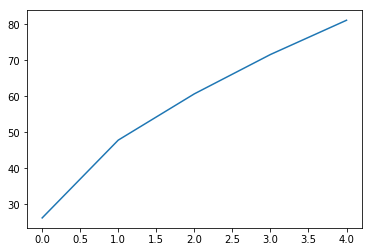

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#from sklearn.feature_selection import chi2

filename='C:\\Users\\akoguab\\Desktop\\R and D\\Data science\\data set\\pimas.csv'
names= ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi','age','class']

dataset=pd.read_csv(filename,names=names)

# First 20 rows of your data

print(dataset.head(20))

# dimensions of your data

print(dataset.shape)

array=dataset.values
X=array[:,0:8]
Y=array[:,8]

from sklearn.preprocessing import scale
X=scale(X)

pca=PCA(n_components=.8)
#pca=PCA(n_components=3)
fit=pca.fit(X)

print("Explained Variance ratio",fit.explained_variance_ratio_)
print("Explained variance/Eigenvalues",pca.explained_variance_)
print("Components/eigen vectors",pca.components_)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var)

plt.plot(var)

plt.show()
#print(fit.components_)